In [1]:
#import standard libraries
import pandas as pd
import numpy as np
from numpy import where
from matplotlib import pyplot
import matplotlib.pyplot as plt
from matplotlib import style 

# Check scikit-learn version
import sklearn
#import the kmeans algorithm
from sklearn.cluster import KMeans
#from sklearn.datasets import make_classification
from sklearn.datasets import make_blobs
# This is the version that will be used
print(sklearn.__version__)

#import functions from the tutorial
from functions import *

0.23.1


In [2]:
import pandas as pd
df=pd.read_csv('Resources/Data/scaled_data.csv')
df=df.drop(columns=['Unnamed: 0', 'Happiness (Dystopia)', 'Life_Expectancy (LED)'], axis=1)

In [3]:
df.corr().style.background_gradient()

In [4]:
columns_int=['GDP', 'Social_Support',
       'Life_Expectancy (Happiness)', 'Freedom_Score',
       'Beer_Servings',
       'Spirit_Servings', 'Wine_Servings',
       'Adult_Mortality',
       'thinness1-19years',
       'Schooling']
X=df[columns_int[:22]].dropna()
len(X)

155

In [5]:
X

GDP  Social_Support  Life_Expectancy (Happiness)  Freedom_Score  \
0    0.929138        0.979132                     0.936153       0.973512   
1    0.940905        0.980836                     0.942685       0.975842   
2    0.958889        0.967350                     0.964818       0.944962   
3    0.940779        1.000000                     0.950464       0.973224   
4    0.968310        0.977240                     0.953078       0.980259   
..        ...             ...                          ...            ...   
150  0.578582        0.327762                     0.588507       0.657315   
151  0.663725        0.554891                     0.795510       0.923683   
152  0.686921        0.782925                     0.724140       0.729702   
153  0.648464        0.568097                     0.664023       0.462887   
154  0.651739        0.482591                     0.684725       0.406742   

     Beer_Servings  Spirit_Servings  Wine_Servings  Adult_Mortality  \
0         0.699468         0.356568       0.262162         0.157025   
1         0.595745         0.217158       0.751351         0.146694   
2         0.492021         0.268097       0.756757         0.101240   
3         0.619681         0.163539       0.210811         0.101240   
4         0.449468         0.190349       0.348649         0.121901   
..             ...              ...            ...              ...   
150       0.045213         0.005362       0.002703         0.820248   
151       0.114362         0.005362       0.000000         0.469008   
152       0.170213         0.048257       0.010811         0.694215   
153       0.300496         0.208662       0.148503         0.685950   
154       0.000000         0.000000       0.000000         0.543388   

     thinness1-19years  Schooling  
0             0.033708   0.833333  
1             0.041199   0.941176  
2             0.014981   0.784314  
3             0.037453   0.931373  
4             0.029963   0.867647  
..                 ...        ...  
150           0.307116   0.348039  
151           0.213483   0.529412  
152           0.209738   0.504902  
153           0.168281   0.240196  
154           0.644195   0.495098  

[155 rows x 10 columns]

Index(['GDP', 'Social_Support', 'Life_Expectancy (Happiness)', 'Freedom_Score',
       'Beer_Servings', 'Spirit_Servings', 'Wine_Servings', 'Adult_Mortality',
       'thinness1-19years', 'Schooling'],
      dtype='object')
2 clusters: 0.3403167265620015
2 clusters: -28.417330659309474


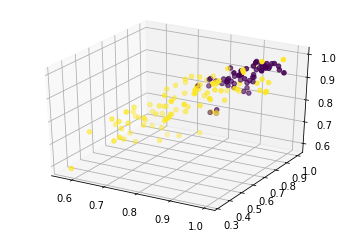

Index(['GDP', 'Social_Support', 'Life_Expectancy (Happiness)', 'Freedom_Score',
       'Beer_Servings', 'Spirit_Servings', 'Wine_Servings', 'Adult_Mortality',
       'thinness1-19years', 'Schooling'],
      dtype='object')
3 clusters: 0.2834813984081259
3 clusters: -22.169386530270597


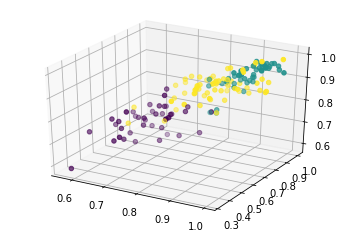

Index(['GDP', 'Social_Support', 'Life_Expectancy (Happiness)', 'Freedom_Score',
       'Beer_Servings', 'Spirit_Servings', 'Wine_Servings', 'Adult_Mortality',
       'thinness1-19years', 'Schooling'],
      dtype='object')
4 clusters: 0.2775493510720533
4 clusters: -18.551714122073285


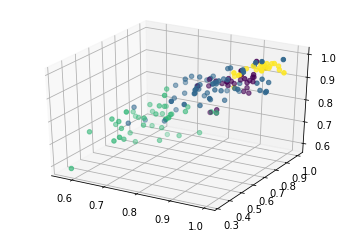

Index(['GDP', 'Social_Support', 'Life_Expectancy (Happiness)', 'Freedom_Score',
       'Beer_Servings', 'Spirit_Servings', 'Wine_Servings', 'Adult_Mortality',
       'thinness1-19years', 'Schooling'],
      dtype='object')
5 clusters: 0.2602556663134398
5 clusters: -16.387368291342863


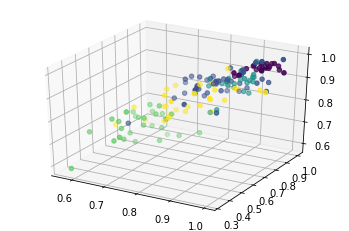

In [6]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
import numpy as np
# X=df[np.random.choice(columns_int, replace=False, size=3)].dropna()
X=df[columns_int].dropna()
guess_list=[2, 3, 4, 5]
for each_guess in guess_list: 
    km=KMeans(n_clusters=each_guess)
    km.fit(X)
    labels=km.labels_
    ax=plt.axes(projection='3d')
    ax.scatter(X.iloc[:, 0], X.iloc[:, 1], X.iloc[:, 2], c=labels)
    print(f'{X.columns}')
    print(f'{each_guess} clusters: {silhouette_score(X, labels)}')
    print(f'{each_guess} clusters: {km.score(X, labels)}')
    plt.show()

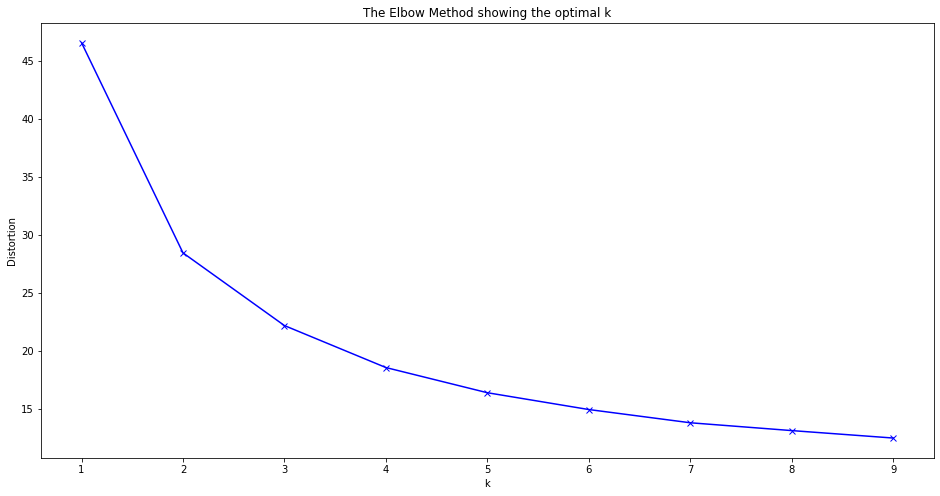

In [7]:
#Running elbow method on the limited data
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(X)
    distortions.append(kmeanModel.inertia_)

plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [8]:
#Skipped the steps scaling & cleaning the data as we already performed this
#First using 2 clusters based on the elbow method done above. Will run 3 after.

#Create a k-means clustering model
kmeans = KMeans(init='random', n_clusters=2, n_init=10)

#Fit the data to the model
kmeans.fit(X)

#Determine which clusters each data point belongs to:
clusters = kmeans.predict(X)

In [9]:
#Let's add a new column, cluster number to the original data so we can see what countries sit in what cluster:

#Add cluster number to the original data
happy_clustered = pd.DataFrame(X, columns=X.columns, index = X.index)
happy_clustered['Happiness_Score'] = df['Happiness_Score']
happy_clustered['cluster'] = clusters

happy_clustered.head()

GDP  Social_Support  Life_Expectancy (Happiness)  Freedom_Score  \
0  0.929138        0.979132                     0.936153       0.973512   
1  0.940905        0.980836                     0.942685       0.975842   
2  0.958889        0.967350                     0.964818       0.944962   
3  0.940779        1.000000                     0.950464       0.973224   
4  0.968310        0.977240                     0.953078       0.980259   

   Beer_Servings  Spirit_Servings  Wine_Servings  Adult_Mortality  \
0       0.699468         0.356568       0.262162         0.157025   
1       0.595745         0.217158       0.751351         0.146694   
2       0.492021         0.268097       0.756757         0.101240   
3       0.619681         0.163539       0.210811         0.101240   
4       0.449468         0.190349       0.348649         0.121901   

   thinness1-19years  Schooling  Happiness_Score  cluster  
0           0.033708   0.833333         1.000000        0  
1           0.041199   0.941176         0.979113        0  
2           0.014981   0.784314         0.968138        0  
3           0.037453   0.931373         0.961043        0  
4           0.029963   0.867647         0.958930        0

In [10]:
from sklearn.decomposition import PCA

#Create a PCA model to reduce our data to 2 dimensions for visualization
pca = PCA(n_components=2)
pca.fit(X)

#Transfer the scaled data to the new PCA space
happy_reduced = pca.transform(X)

In [11]:
#Convert to a data frame
happy_reduced_df = pd.DataFrame(happy_reduced, index = X.index, columns=['PC1', 'PC2'])
happy_reduced_df['cluster'] = clusters
happy_reduced_df.head()

PC1       PC2  cluster
0  0.867029 -0.087387        0
1  0.940759 -0.265106        0
2  0.896832 -0.284890        0
3  0.806705 -0.169571        0
4  0.770536 -0.217753        0

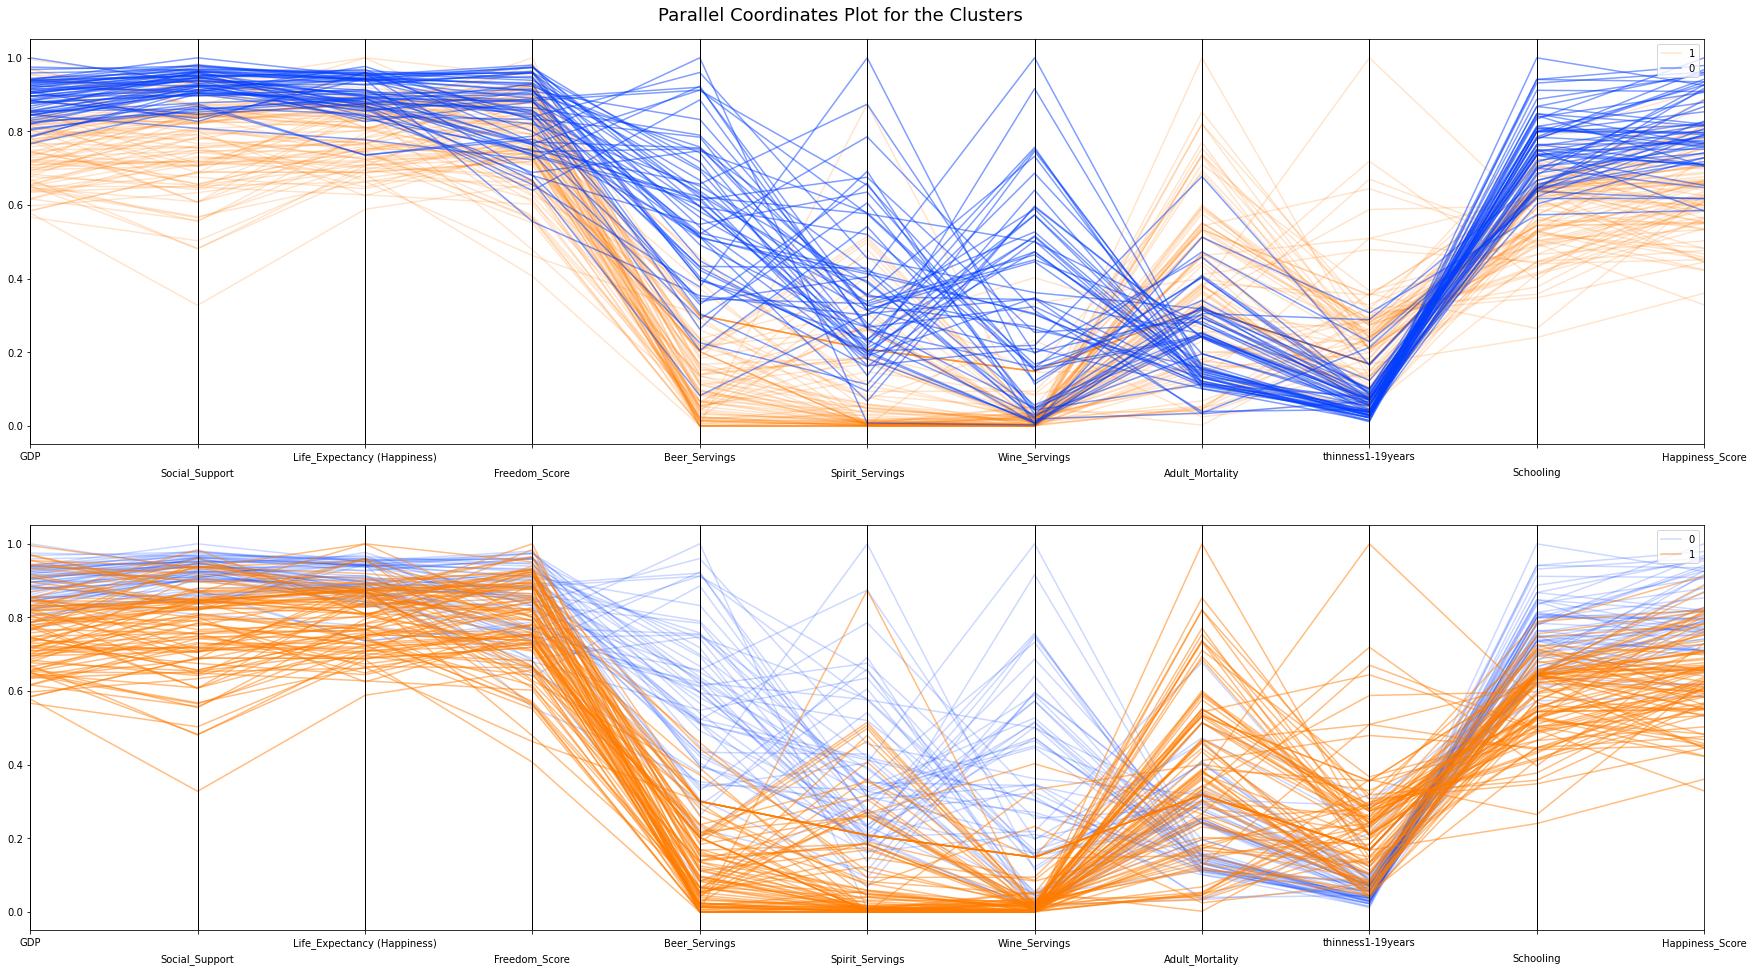

In [12]:
display_parallel_coordinates(happy_clustered, 2)

In [13]:
#Now using 3 clusters.

#Create a k-means clustering model
kmeans = KMeans(init='random', n_clusters=3, n_init=10)

#Fit the data to the model
kmeans.fit(X)

#Determine which clusters each data point belongs to:
clusters = kmeans.predict(X)

In [14]:
#Let's add a new column, cluster number to the original data so we can see what countries sit in what cluster:

#Add cluster number to the original data
happy_clustered = pd.DataFrame(X, columns=X.columns, index = X.index)
happy_clustered['Happiness_Score'] = df['Happiness_Score']
happy_clustered['cluster'] = clusters

happy_clustered.head()

GDP  Social_Support  Life_Expectancy (Happiness)  Freedom_Score  \
0  0.929138        0.979132                     0.936153       0.973512   
1  0.940905        0.980836                     0.942685       0.975842   
2  0.958889        0.967350                     0.964818       0.944962   
3  0.940779        1.000000                     0.950464       0.973224   
4  0.968310        0.977240                     0.953078       0.980259   

   Beer_Servings  Spirit_Servings  Wine_Servings  Adult_Mortality  \
0       0.699468         0.356568       0.262162         0.157025   
1       0.595745         0.217158       0.751351         0.146694   
2       0.492021         0.268097       0.756757         0.101240   
3       0.619681         0.163539       0.210811         0.101240   
4       0.449468         0.190349       0.348649         0.121901   

   thinness1-19years  Schooling  Happiness_Score  cluster  
0           0.033708   0.833333         1.000000        2  
1           0.041199   0.941176         0.979113        2  
2           0.014981   0.784314         0.968138        2  
3           0.037453   0.931373         0.961043        2  
4           0.029963   0.867647         0.958930        2

In [15]:
from sklearn.decomposition import PCA

#Create a PCA model to reduce our data to 2 dimensions for visualization
pca = PCA(n_components=2)
pca.fit(X)

#Transfer the scaled data to the new PCA space
happy_reduced = pca.transform(X)

In [16]:
#Convert to a data frame
happy_reduced_df = pd.DataFrame(happy_reduced, index = X.index, columns=['PC1', 'PC2'])
happy_reduced_df['cluster'] = clusters
happy_reduced_df.head()

PC1       PC2  cluster
0  1.093757 -0.320265        2
1  1.135778 -0.430739        2
2  1.108134 -0.396571        2
3  1.055360 -0.284525        2
4  1.034621 -0.257270        2

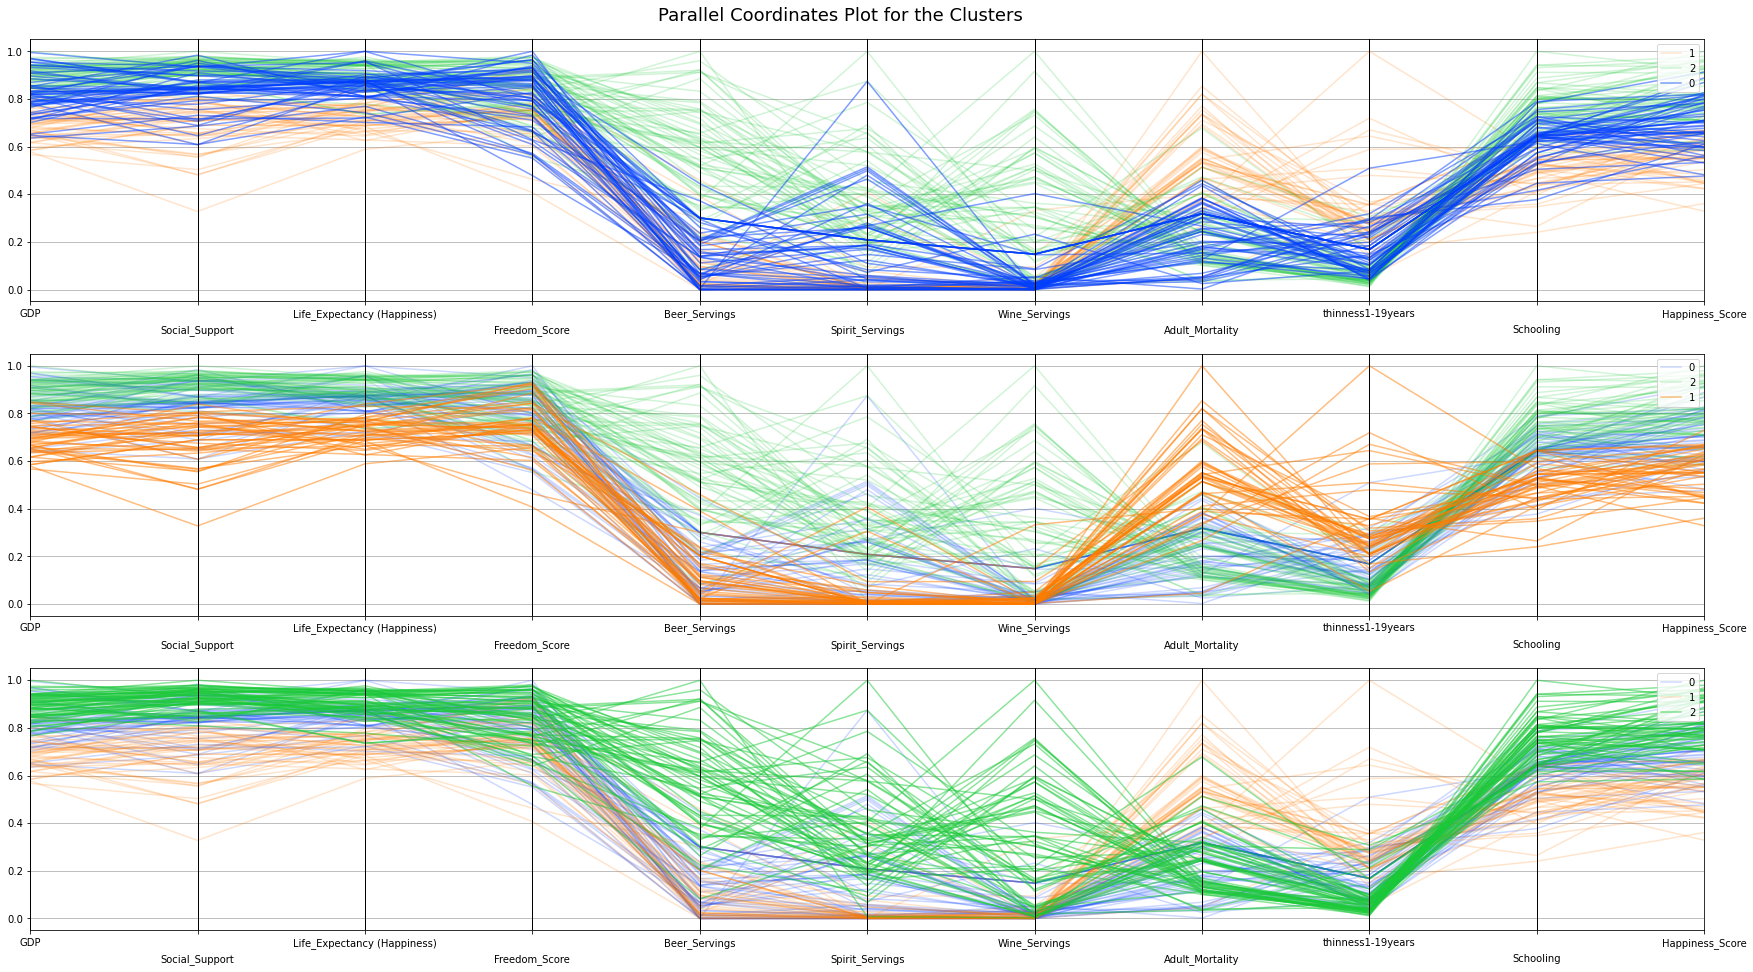

In [17]:
display_parallel_coordinates(happy_clustered, 3)